<a href="https://colab.research.google.com/github/lovepreetmultani/Anti-Money-Laundering/blob/main/ML_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [5]:
fraud=pd.read_csv("drive/My Drive/Dissertation/Data-2-small.csv")

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tx_fraud           10007 non-null  bool   
 1   tx_amount          10007 non-null  float64
 2   s_pagerank         10007 non-null  float64
 3   s_label            10007 non-null  int64  
 4   s_min_send_tx      10007 non-null  float64
 5   s_min_receieve_tx  10007 non-null  float64
 6   s_max_send_tx      10007 non-null  float64
 7   s_max_recieve_tx   10007 non-null  float64
 8   s_avg_send_tx      10007 non-null  float64
 9   s_avg_recieve_tx   10007 non-null  float64
 10  s_cnt_recieve_tx   10007 non-null  int64  
 11  s_cnt_send_tx      10007 non-null  int64  
 12  s_timestamp        10007 non-null  int64  
 13  r_pagerank         10007 non-null  float64
 14  r_label            10007 non-null  int64  
 15  r_min_send_tx      10007 non-null  float64
 16  r_min_receieve_tx  100

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [8]:
X, y = smote.fit_resample(fraud.drop('tx_fraud', axis=1), fraud['tx_fraud'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras import losses

In [22]:
'''   model = Sequential()

  model.add(Dense(units = 78, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 39, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 19, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1

  model.compile(optimizer = "adam", loss = "binary_crossentropy") '''

'   model = Sequential()\n\n  model.add(Dense(units = 78, activation="relu"))\n  model.add(Dropout(0.2))\n\n  model.add(Dense(units = 39, activation="relu"))\n  model.add(Dropout(0.2))\n\n  model.add(Dense(units = 19, activation="relu"))\n  model.add(Dropout(0.2))\n\n  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1\n\n  model.compile(optimizer = "adam", loss = "binary_crossentropy") '

In [23]:
''' model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400) '''

' model.fit(x=X_train,y=y_train,\n          validation_data=(X_test,y_test),\n          batch_size=128,\n          epochs=400) '

In [24]:
''' losses.plot() '''

' losses.plot() '

In [25]:
''' test_predictions = model.predict(X_test)
test_predictions = np.round(test_predictions) '''

' test_predictions = model.predict(X_test)\ntest_predictions = np.round(test_predictions) '

In [26]:
''' result = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(result)
print('\n')
result1 = classification_report(y_test, test_predictions)
print("Classification Report:",)
print (result1)
print('\n')
result2 = accuracy_score(y_test,test_predictions)
print("Accuracy:",result2)
print('\n')
# calculate precision and recall scores
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1score = f1_score(y_test, test_predictions)

# print the results
print("Precision:", precision)
print("Recall:", recall)
print("f1 score:", recall)

print(roc_auc_score(y_test, test_predictions))

fpr, tpr, _ = roc_curve(y_test, test_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() '''

' result = confusion_matrix(y_test, test_predictions)\nprint("Confusion Matrix:")\nprint(result)\nprint(\'\n\')\nresult1 = classification_report(y_test, test_predictions)\nprint("Classification Report:",)\nprint (result1)\nprint(\'\n\')\nresult2 = accuracy_score(y_test,test_predictions)\nprint("Accuracy:",result2)\nprint(\'\n\')\n# calculate precision and recall scores\nprecision = precision_score(y_test, test_predictions)\nrecall = recall_score(y_test, test_predictions)\nf1score = f1_score(y_test, test_predictions)\n\n# print the results\nprint("Precision:", precision)\nprint("Recall:", recall)\nprint("f1 score:", recall)\n\nprint(roc_auc_score(y_test, test_predictions))\n\nfpr, tpr, _ = roc_curve(y_test, test_predictions)\n\nplt.clf()\nplt.plot(fpr, tpr)\nplt.xlabel(\'FPR\')\nplt.ylabel(\'TPR\')\nplt.title(\'ROC curve\')\nplt.show() '

In [10]:
from xgboost.sklearn import XGBRFClassifier
# model = XGBRFClassifier(n_estimators=20, subsample=0.9, colsample_bynode=0.2)
model = XGBRFClassifier(n_estimators=10)

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=None)

In [12]:
from sklearn.model_selection import cross_val_score
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [13]:
import numpy as np
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 1.000 (0.000)


In [14]:
v_scores = cross_val_score(model,X_test,y_test,scoring='accuracy', cv=cv,n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(v_scores), np.std(v_scores)))

Mean Accuracy: 1.000 (0.000)


In [15]:
from sklearn.metrics import average_precision_score

In [37]:
# Long computation in this cell (~1.8 minutes)
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(X_train, y_train).predict_proba(X_test)
print('AUPRC = {}'.format(average_precision_score(y_test, \
                                              probabilities[:, 1])))

AUPRC = 0.9999110561923813


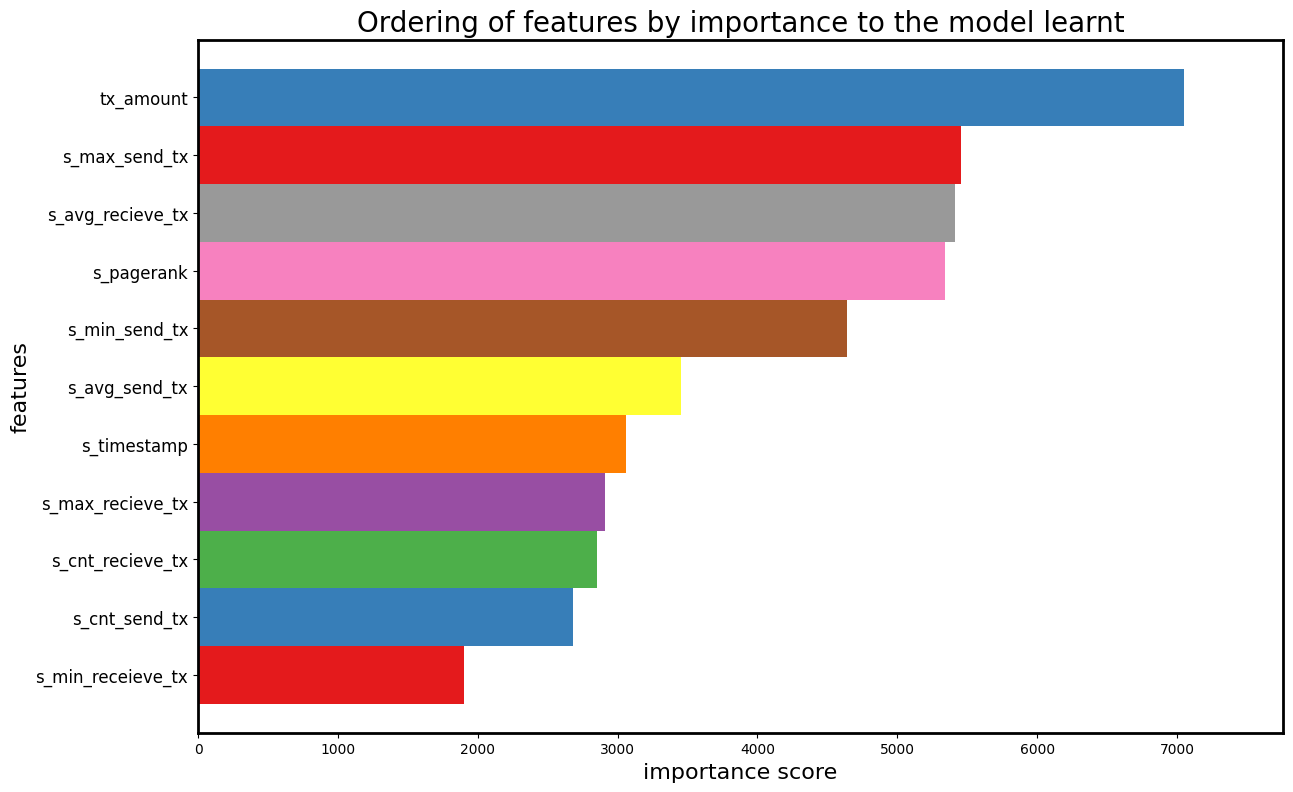

In [38]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

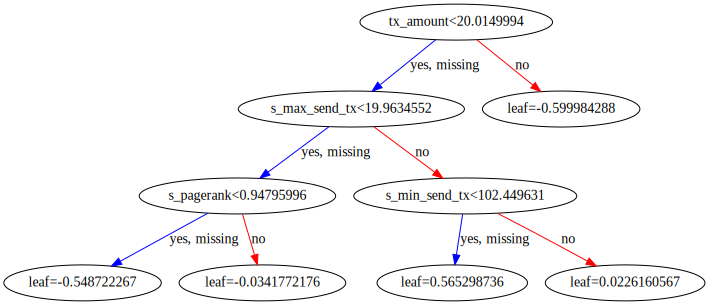

In [39]:
to_graphviz(clf)

In [16]:
from lightgbm import LGBMClassifier

In [17]:
lgb_cv_model = LGBMClassifier(learning_rate=0.01, max_depth=10, subsample=0.6,
                              n_estimators=1000, min_child_samples=10).fit(X_train, y_train)
y_pred = lgb_cv_model.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7394, number of negative: 7326
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5333
[LightGBM] [Info] Number of data points in the train set: 14720, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502310 -> initscore=0.009239
[LightGBM] [Info] Start training from score 0.009239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [ ]:
!pip install shap
import shap
shap.initjs()

In [ ]:
shap_values = shap.TreeExplainer(lgb_cv_model).shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
exp = Explanation(shap_values[:,:,0], shap_values.base_values[:,0], X_test, feature_names=X_test.columns)
idx = 1
shap.plots.waterfall(exp[idx])

In [ ]:
!pip install explainerdashboard

In [18]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(lgb_cv_model, X_test, y_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


In [19]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:525: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

 99%|===================| 3654/3680 [01:54<00:00]       

Calculating prediction probabilities...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[

<IPython.core.display.Javascript object>